In [409]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [410]:
liga1_player = pd.read_csv("player_data.csv")

In [411]:
liga1_player.head(3)

,kit_number,player_name,position,Date of birth / Age,nationality,height,foot,joined,signed_from,contract,market_value,club_name
0,3,Bayu Aji,Centre-Back,NaN,Indonesia,"1,78m",NaN,21-Jan-23,NZR Sumbersari FC,-,€10k,Arema FC
1,4,Syaeful Anwar,Centre-Back,"Dec 1, 1994 (28)",Indonesia,"1,84m",right,27-Apr-22,Persita Tangerang,2024,€125k,Arema FC
2,5,Bagas Adi,Centre-Back,"Mar 8, 1997 (26)",Indonesia,"1,76m",left,7-Jan-20,Bhayangkara FC,-,€200k,Arema FC


In [412]:
liga1_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   kit_number           568 non-null    object
 1   player_name          568 non-null    object
 2   position             568 non-null    object
 3   Date of birth / Age  550 non-null    object
 4   nationality          568 non-null    object
 5   height               567 non-null    object
 6   foot                 522 non-null    object
 7   joined               568 non-null    object
 8   signed_from          564 non-null    object
 9   contract             538 non-null    object
 10  market_value         567 non-null    object
 11  club_name            568 non-null    object
dtypes: object(12)
memory usage: 53.4+ KB


*There are 568 players in Liga 1 Indonesia*

### Data Cleaning

In [413]:
liga1_player["birth_date"] = liga1_player["Date of birth / Age"].str[:-5] #Get birth date string values
liga1_player['birth_date'] = pd.to_datetime(liga1_player['birth_date']) #Convert to datetime type

liga1_player["age"] = liga1_player["Date of birth / Age"].str[-3:-1] #Get age string values
liga1_player['age'] = round(pd.to_numeric(liga1_player['age']),0) #Convert to numeric

liga1_player["height"] = liga1_player["height"].replace(["-","-."], 0) #Replace "-" values to 0
liga1_player["height"] = liga1_player["height"].str[:1] + "." + liga1_player["height"].str[2:4] #Get only the height number from string values
liga1_player["height"] = pd.to_numeric(liga1_player["height"]) #Convert to numeric
liga1_player.rename(columns = {'height':'height_M'}, inplace = True)

liga1_player["joined"] = liga1_player["joined"].replace("-",0) #Replace "-" to 0
liga1_player["joined"] = pd.to_datetime(liga1_player["joined"]) #Convert to datetime type

liga1_player["market_value"] = liga1_player["market_value"].replace("-", 0) 
liga1_player["market_value"] = liga1_player["market_value"].str[1:-1] #Get only the market value number from string values
liga1_player["market_value"] = pd.to_numeric(liga1_player["market_value"]) #Convert to numeric type
liga1_player["market_value"] = liga1_player["market_value"]*1000
liga1_player.rename(columns = {'market_value':'market_value_EUR'}, inplace = True)

liga1_player = liga1_player.drop(columns='Date of birth / Age')




In [414]:
liga1_player.position.value_counts()

Centre-Back           91
Goalkeeper            69
Centre-Forward        65
Defensive Midfield    62
Attacking Midfield    61
Right Winger          51
Right-Back            45
Left-Back             41
Left Winger           34
Central Midfield      32
Midfield               4
Goal Keeper            3
Attack                 2
Center-Back            2
Second Striker         2
Left Midfield          1
Defence                1
Centre Midfield        1
Center Midfield        1
Name: position, dtype: int64

In [415]:
# Correcting data in player position
liga1_player["position"] = liga1_player["position"].replace(["Centre Midfield", "Center Midfield"], "Central Midfield")
liga1_player["position"] = liga1_player["position"].replace("Goal Keeper", "Goalkeeper")
liga1_player["position"] = liga1_player["position"].replace("Center-Back","Centre-Back")

In [416]:
liga1_player.contract.value_counts()

-            303
2024          56
31-May-24     31
30-Jun-24     19
30-Apr-24     15
31-May-25     12
30-Jun-25     11
31-Dec-23     10
31-May-26     10
2026           8
31-Mar-24      8
31-Mar-23      6
2025           6
30-Apr-25      4
30-Jun-26      3
30-Apr-27      3
31-Dec-25      3
1-Jun-24       3
16-Jul-05      3
28-Feb-23      2
30-Apr-26      2
1-Jul-24       2
31-Dec-24      2
5-Oct-24       1
1-Apr-26       1
27-Apr-24      1
20-May-25      1
28-Feb-27      1
14-May-23      1
15-Jun-24      1
31-Jan-25      1
14-May-24      1
27-Jan-25      1
14-Jun-26      1
30-Jun-23      1
Dec, 2023      1
3-Oct-24       1
20-Jul-23      1
1-Mar-25       1
Name: contract, dtype: int64

In [417]:
liga1_player["contract"] = liga1_player["contract"].replace("2024","31-Dec-24")
liga1_player["contract"] = liga1_player["contract"].replace("2025","31-Dec-25")
liga1_player["contract"] = liga1_player["contract"].replace("2026","31-Dec-26")
liga1_player["contract"] = liga1_player["contract"].replace("Dec, 2023","31-Dec-23")
liga1_player["contract"] = liga1_player["contract"].replace("-",np.nan)
liga1_player["contract"] = pd.to_datetime(liga1_player["contract"])

In [418]:
liga1_player.describe(include="all").T

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
kit_number,568,93,23,17,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_name,568,564,Ferdiansyah,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
position,568,15,Centre-Back,93,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,568,35,Indonesia,461,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height_M,531.0,NaN,NaN,NaN,NaT,NaT,1.758173,0.07345,1.58,1.7,1.75,1.81,1.98
foot,522,4,right,382,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
joined,568,196,2023-07-01 00:00:00,191,1970-01-01,2023-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
signed_from,564,197,Without Club,35,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contract,235,35,2024-12-31 00:00:00,58,2005-07-16,2027-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market_value_EUR,504.0,NaN,NaN,NaN,NaT,NaT,140228.174603,92810.638571,10000.0,75000.0,125000.0,200000.0,600000.0


In [419]:
liga1_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   kit_number        568 non-null    object        
 1   player_name       568 non-null    object        
 2   position          568 non-null    object        
 3   nationality       568 non-null    object        
 4   height_M          531 non-null    float64       
 5   foot              522 non-null    object        
 6   joined            568 non-null    datetime64[ns]
 7   signed_from       564 non-null    object        
 8   contract          235 non-null    datetime64[ns]
 9   market_value_EUR  504 non-null    float64       
 10  club_name         568 non-null    object        
 11  birth_date        550 non-null    datetime64[ns]
 12  age               550 non-null    float64       
dtypes: datetime64[ns](3), float64(3), object(7)
memory usage: 57.8+ KB


In [420]:
liga1_player.isnull().sum()

kit_number            0
player_name           0
position              0
nationality           0
height_M             37
foot                 46
joined                0
signed_from           4
contract            333
market_value_EUR     64
club_name             0
birth_date           18
age                  18
dtype: int64

# Player age

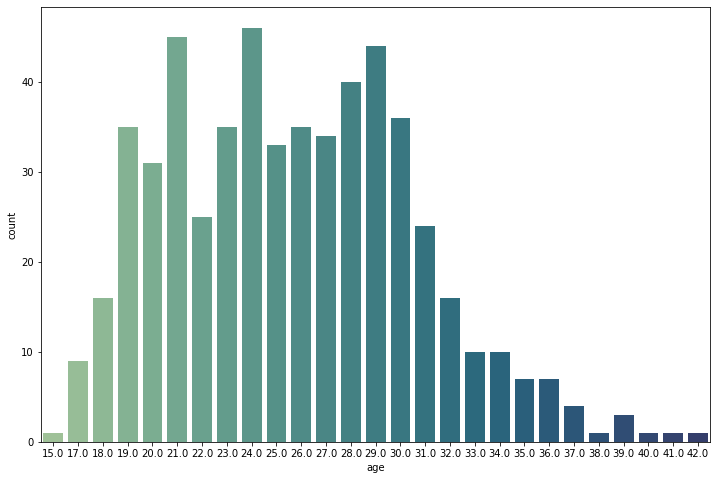

In [421]:
plt.figure(figsize=(12,8))
sns.countplot(data=liga1_player, x="age", palette="crest", )

In [422]:
liga1_player[(liga1_player.age == 15)|(liga1_player.age >= 40)][["player_name","position","nationality","club_name","age"]]

,player_name,position,nationality,club_name,age
165,Beto,Centre-Forward,Indonesia,Madura United FC,42.0
190,Wawan Hendrawan,Goalkeeper,Indonesia,Madura United FC,40.0
276,Maman Abdurahman,Centre-Back,Indonesia,Persija Jakarta,41.0
375,Arkhan Kaka,Centre-Forward,Indonesia,Persis Solo,15.0


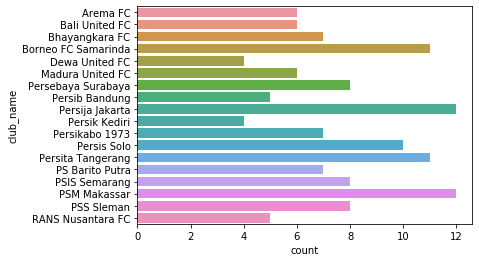

In [423]:
young_player = liga1_player[liga1_player.age <= 21][["player_name","position","nationality","club_name","age"]]
sns.countplot(data=young_player, y="club_name")

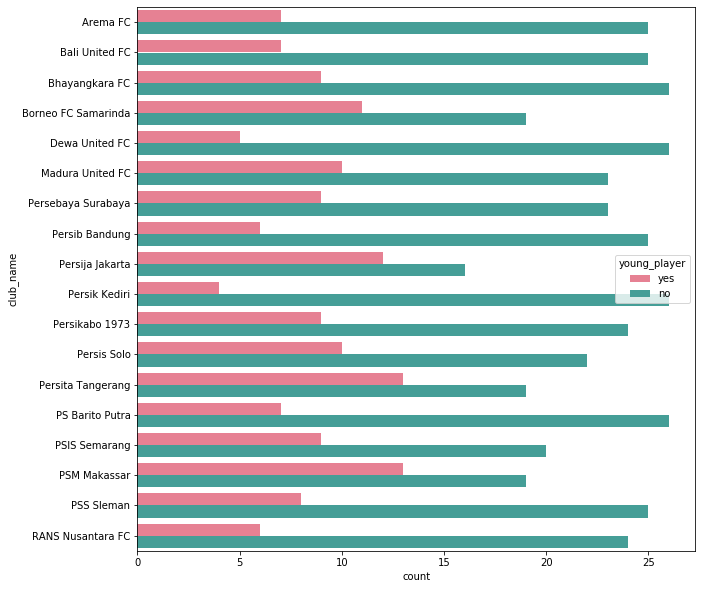

In [424]:
liga1_player["young_player"] = liga1_player.apply(lambda x: "no" if x['age'] > 21 else "yes", axis=1)
plt.figure(figsize=(10,10))
ax = sns.countplot(data=liga1_player, y="club_name", hue="young_player", palette="husl")

In [425]:
liga1_player[liga1_player["young_player"]=="yes"].groupby(by="club_name").count()

,kit_number,player_name,position,nationality,height_M,foot,joined,signed_from,contract,market_value_EUR,birth_date,age,young_player
club_name,,,,,,,,,,,,,
Arema FC,7,7,7,7,7,6,7,7,3,7,6,6,7
Bali United FC,7,7,7,7,7,5,7,7,1,6,6,6,7
Bhayangkara FC,9,9,9,9,9,8,9,9,1,5,7,7,9
Borneo FC Samarinda,11,11,11,11,11,9,11,10,11,9,11,11,11
Dewa United FC,5,5,5,5,5,5,5,5,3,3,4,4,5
Madura United FC,10,10,10,10,6,5,10,10,4,5,6,6,10
PS Barito Putra,7,7,7,7,6,6,7,7,3,7,7,7,7
PSIS Semarang,9,9,9,9,7,6,9,9,0,5,8,8,9
PSM Makassar,13,13,13,13,11,10,13,13,8,11,12,12,13


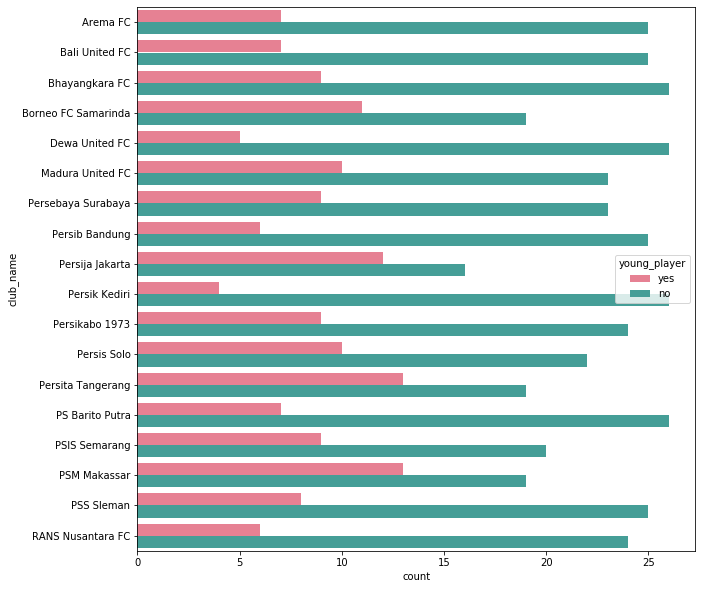

In [426]:
liga1_player["young_player"] = liga1_player.apply(lambda x: "no" if x['age'] > 21 else "yes", axis=1)
plt.figure(figsize=(10,10))
ax = sns.countplot(data=liga1_player, y="club_name", hue="young_player", palette="husl")

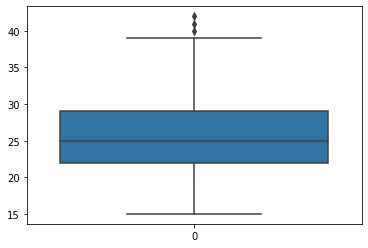

In [427]:
sns.boxplot(liga1_player.age)

In [428]:
liga1_player[liga1_player.age <= 21]["club_name"].value_counts()

PSM Makassar           12
Persija Jakarta        12
Borneo FC Samarinda    11
Persita Tangerang      11
Persis Solo            10
PSIS Semarang           8
PSS Sleman              8
Persebaya Surabaya      8
Bhayangkara FC          7
Persikabo 1973          7
PS Barito Putra         7
Arema FC                6
Madura United FC        6
Bali United FC          6
RANS Nusantara FC       5
Persib Bandung          5
Dewa United FC          4
Persik Kediri           4
Name: club_name, dtype: int64

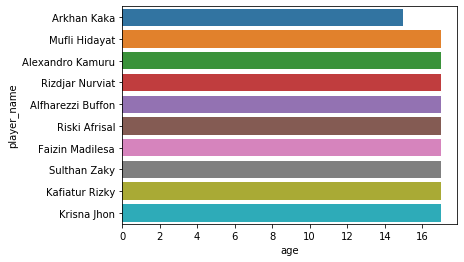

In [429]:
# youngest player
sns.barplot(data=liga1_player.sort_values("age")[:10], x="age", y="player_name")

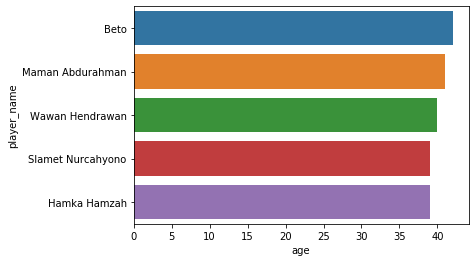

In [430]:
# oldest player
sns.barplot(data=liga1_player.sort_values("age", ascending=False)[:5], x="age", y="player_name")

# nasionality

In [431]:
# liga1_player["foreign_player"] = liga1_player.apply(lambda x: "no" if x['nationality'] == "Indonesia" else "yes", axis=1)
liga1_player[liga1_player.nationality != "Indonesia"].groupby(by="club_name").count()[["player_name"]]

,player_name
club_name,
Arema FC,6
Bali United FC,6
Bhayangkara FC,6
Borneo FC Samarinda,6
Dewa United FC,6
Madura United FC,6
PS Barito Putra,6
PSIS Semarang,6
PSM Makassar,6


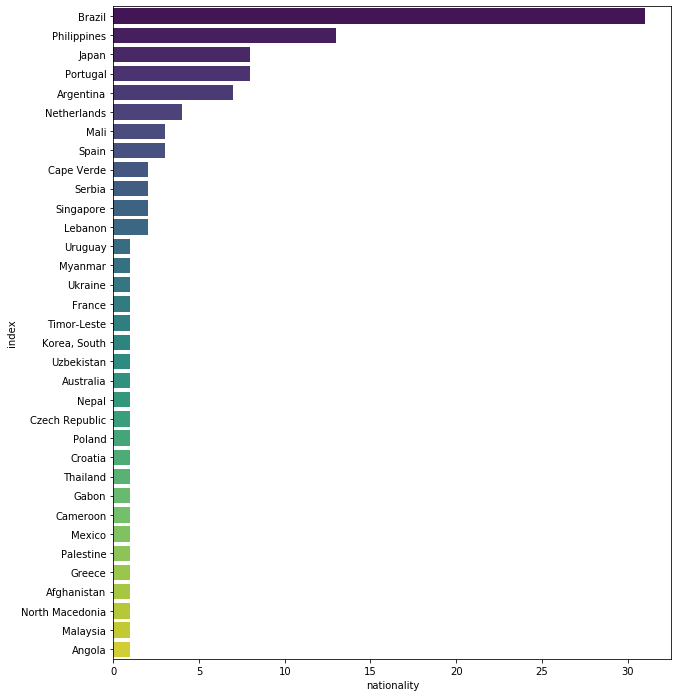

In [432]:
# the top five foreign players
plt.figure(figsize=(10,12))
sns.barplot(data = pd.DataFrame(liga1_player.nationality.value_counts()[1:]).reset_index(), y="index", x="nationality", palette="viridis")

In [433]:
liga1_player.nationality.value_counts()[1:].reset_index()

,index,nationality
0,Brazil,31
1,Philippines,13
2,Japan,8
3,Portugal,8
4,Argentina,7
5,Netherlands,4
6,Mali,3
7,Spain,3
8,Cape Verde,2
9,Serbia,2


# foot 

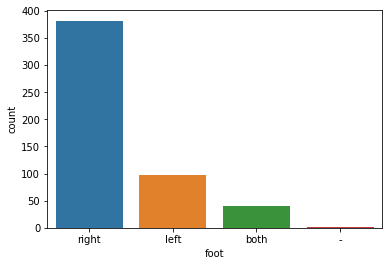

In [434]:
sns.countplot(data=liga1_player, x="foot")

# joined

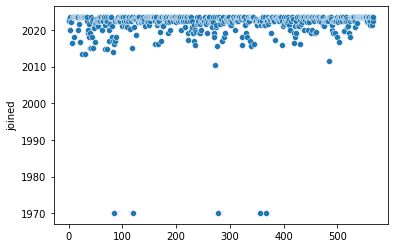

In [435]:
sns.scatterplot(data = liga1_player.joined)

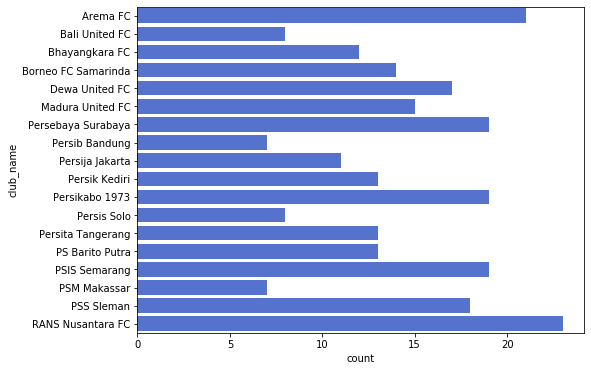

In [502]:
# error joined database
import datetime
plt.figure(figsize=(8,6))b
sns.countplot(data=liga1_player[liga1_player["joined"] > datetime.datetime(2023,1,1)], y="club_name", color="royalblue")

In [503]:
liga1_player[liga1_player["joined"] > datetime.datetime(2023,1,1)]["club_name"].value_counts()

RANS Nusantara FC      23
Arema FC               21
Persebaya Surabaya     19
Persikabo 1973         19
PSIS Semarang          19
PSS Sleman             18
Dewa United FC         17
Madura United FC       15
Borneo FC Samarinda    14
Persita Tangerang      13
PS Barito Putra        13
Persik Kediri          13
Bhayangkara FC         12
Persija Jakarta        11
Bali United FC          8
Persis Solo             8
Persib Bandung          7
PSM Makassar            7
Name: club_name, dtype: int64

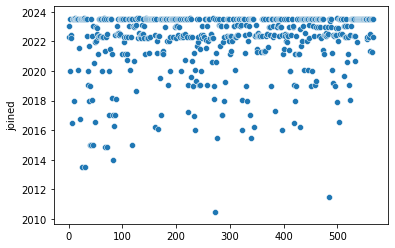

In [437]:
sns.scatterplot(data = liga1_player[liga1_player["joined"] > datetime.datetime(2000,1,1)]["joined"])

In [438]:
# veteran player in the club
liga1_player.sort_values(by="joined")[5:15]

,kit_number,player_name,position,nationality,height_M,foot,joined,signed_from,contract,market_value_EUR,club_name,birth_date,age,young_player
272,26,Andritany,Goalkeeper,Indonesia,1.78,right,2010-07-01,Sriwijaya FC,2026-06-30,250000.0,Persija Jakarta,1991-12-26,31.0,no
485,17,Rasyid Bakri,Central Midfield,Indonesia,1.64,right,2011-07-01,PSM Makassar Youth,2024-12-31,150000.0,PSM Makassar,1991-01-17,32.0,no
30,87,Johan Alfarizi,Left-Back,Indonesia,1.73,left,2013-07-01,Arema Indonesia,NaT,175000.0,Arema FC,1990-05-25,33.0,no
24,41,Dendi Santoso,Right Winger,Indonesia,1.72,both,2013-07-01,Arema Indonesia,NaT,125000.0,Arema FC,1990-05-16,33.0,no
83,23,Wahyu Subo Seto,Attacking Midfield,Indonesia,1.68,right,2014-01-01,Surabaya United Youth,NaT,200000.0,Bhayangkara FC,1993-07-16,29.0,no
68,5,Fatchu Rochman,Left-Back,Indonesia,1.70,both,2014-11-01,Persekap Pasuruan,NaT,125000.0,Bhayangkara FC,1995-06-28,28.0,no
71,8,Muhammad Hargianto,Defensive Midfield,Indonesia,1.68,right,2014-11-11,Diklat Ragunan,NaT,225000.0,Bhayangkara FC,1996-07-24,26.0,no
118,28,Terens Puhiri,Right Winger,Indonesia,1.67,right,2015-01-01,Persisam Putra Samarinda (- 2014),2024-04-30,200000.0,Borneo FC Samarinda,1996-10-13,26.0,no
41,14,Fadil Sausu,Central Midfield,Indonesia,1.74,left,2015-01-13,Persisam Putra Samarinda (- 2014),2024-12-31,50000.0,Bali United FC,1985-04-19,38.0,no
39,11,Yabes Roni,Left Winger,Indonesia,1.68,both,2015-01-13,Without Club,NaT,175000.0,Bali United FC,1995-02-06,28.0,no


In [439]:
# new player in the club
liga1_player.sort_values(by="joined",ascending=False)[:10]

,kit_number,player_name,position,nationality,height_M,foot,joined,signed_from,contract,market_value_EUR,club_name,birth_date,age,young_player
225,-,Levy Madinda,Attacking Midfield,Gabon,1.82,right,2023-07-20,Johor Darul Ta'zim,2023-12-31,175000.0,Persib Bandung,1992-06-11,31.0,no
500,68,Daffa Salman,Centre-Back,Indonesia,NaN,right,2023-07-20,Persela Lamongan,NaT,NaN,PSM Makassar,2002-04-30,21.0,yes
131,3,Junior Eldstal,Centre-Back,Malaysia,1.91,right,2023-07-20,Johor Darul Ta'zim,2023-12-31,150000.0,Dewa United FC,1991-09-16,31.0,no
268,22,Oliver Bias,Right Winger,Philippines,1.64,both,2023-07-20,FK Pribram,2024-06-30,75000.0,Persija Jakarta,2001-06-15,22.0,no
29,86,Greg Nwokolo,Left Winger,Indonesia,1.75,right,2023-07-20,Without Club,NaT,100000.0,Arema FC,1986-01-03,37.0,no
143,16,Kafiatur Rizky,Central Midfield,Indonesia,1.72,left,2023-07-20,Borneo FC Samarinda Youth,2024-03-31,NaN,Dewa United FC,2006-07-17,17.0,yes
12,18,Julian Schwarzer,Goalkeeper,Philippines,1.81,NaN,2023-07-20,Kuching City,NaT,100000.0,Arema FC,1999-10-26,23.0,no
127,91,Felipe Cadenazzi,Centre-Forward,Argentina,1.91,left,2023-07-20,Magallanes CF,NaT,225000.0,Borneo FC Samarinda,1991-10-12,31.0,no
65,2,Alef,Centre-Back,Brazil,1.86,right,2023-07-20,Khon Kaen United,NaT,250000.0,Bhayangkara FC,1993-09-10,29.0,no
503,77,Syamil Bahij,Goalkeeper,Indonesia,1.80,NaN,2023-07-14,Without Club,2005-07-16,NaN,PSM Makassar,NaT,NaN,yes


# height

In [440]:
# the heightest player
liga1_player.sort_values(by="height_M", ascending=False)[:5]

,kit_number,player_name,position,nationality,height_M,foot,joined,signed_from,contract,market_value_EUR,club_name,birth_date,age,young_player
475,4,Yuran Fernandes,Centre-Back,Cape Verde,1.98,left,2022-06-04,SC União Torreense,2026-12-31,325000.0,PSM Makassar,1994-10-19,28.0,no
34,4,Elias Dolah,Centre-Back,Thailand,1.96,right,2023-07-01,Port FC,2024-05-31,250000.0,Bali United FC,1993-04-24,30.0,no
471,93,Lucão,Centre-Back,Brazil,1.96,right,2023-07-01,Persikabo 1973,NaT,225000.0,PSIS Semarang,1993-07-10,29.0,no
373,55,Erlangga Setyo,Goalkeeper,Indonesia,1.95,right,2023-01-01,PERSIS Solo Youth,2026-05-31,25000.0,Persis Solo,2003-04-16,20.0,yes
32,1,Adilson Maringá,Goalkeeper,Brazil,1.94,right,2023-07-01,Arema FC,NaT,300000.0,Bali United FC,1990-08-22,32.0,no


In [441]:
# the heightest attak player
attaker = liga1_player[(liga1_player["position"] == "Centre-Forward") | (liga1_player["position"] == "Attack") | (liga1_player["position"] == "Second Striker")]
attaker.sort_values(by="height_M", ascending=False)[:5]

,kit_number,player_name,position,nationality,height_M,foot,joined,signed_from,contract,market_value_EUR,club_name,birth_date,age,young_player
127,91,Felipe Cadenazzi,Centre-Forward,Argentina,1.91,left,2023-07-20,Magallanes CF,NaT,225000.0,Borneo FC Samarinda,1991-10-12,31.0,no
488,20,Adilson Silva,Centre-Forward,Portugal,1.91,right,2023-07-01,Real SC,2024-12-31,NaN,PSM Makassar,1997-07-30,25.0,no
79,18,Crislan,Centre-Forward,Brazil,1.90,left,2023-07-06,Swat Cat,NaT,300000.0,Bhayangkara FC,1992-03-13,31.0,no
288,9,Jefinho,Centre-Forward,Brazil,1.90,right,2023-07-11,Nejmeh SC,NaT,150000.0,Persik Kediri,1994-05-25,29.0,no
104,10,Jelle Goselink,Centre-Forward,Netherlands,1.89,both,2023-07-01,Helmond Sport,NaT,225000.0,Borneo FC Samarinda,1999-07-31,23.0,no


Funfact: the hightest attacker is foreign player

# Signed from

In [442]:
liga1_player.signed_from.value_counts()[:10]

Without Club           35
Arema FC               16
Persija Jakarta        15
Borneo FC Samarinda    15
Bhayangkara FC         14
Persebaya Surabaya     13
PSM Makassar Youth     13
Madura United FC       13
PSM Makassar           12
PSS Sleman             11
Name: signed_from, dtype: int64

In [443]:
# insight: signfrom no club with highest market_value

In [444]:
liga1_player[liga1_player["signed_from"]=="Without Club"].sort_values(by="market_value_EUR", ascending=False)[:10]

,kit_number,player_name,position,nationality,height_M,foot,joined,signed_from,contract,market_value_EUR,club_name,birth_date,age,young_player
192,95,Junior Brandão,Centre-Forward,Brazil,1.87,right,2023-07-01,Without Club,NaT,300000.0,Madura United FC,1995-01-07,28.0,no
46,24,Ricky Fajrin,Left-Back,Indonesia,1.77,left,2015-01-13,Without Club,NaT,275000.0,Bali United FC,1995-09-06,27.0,no
167,11,Lulinha,Left Winger,Brazil,1.70,right,2022-05-09,Without Club,2024-12-31,250000.0,Madura United FC,1990-04-10,33.0,no
224,99,Bruno,Left Winger,Brazil,1.78,both,2023-07-01,Without Club,NaT,250000.0,Persebaya Surabaya,1999-04-08,24.0,no
133,5,Risto Mitrevski,Centre-Back,North Macedonia,1.87,both,2022-05-01,Without Club,2024-04-30,225000.0,Dewa United FC,1991-10-05,31.0,no
39,11,Yabes Roni,Left Winger,Indonesia,1.68,both,2015-01-13,Without Club,NaT,175000.0,Bali United FC,1995-02-06,28.0,no
564,88,Fadilla Akbar,Defensive Midfield,Indonesia,1.73,left,2021-04-14,Without Club,2024-12-31,150000.0,RANS Nusantara FC,2001-09-08,21.0,yes
505,1,Anthony Pinthus,Goalkeeper,Philippines,1.82,right,2023-07-01,Without Club,NaT,150000.0,PSS Sleman,1998-04-04,25.0,no
303,37,Agil Munawar,Right-Back,Indonesia,1.69,right,2021-04-29,Without Club,2024-04-30,150000.0,Persik Kediri,1996-06-10,27.0,no
295,20,Simen Lyngbø,Right-Back,Philippines,1.77,both,2023-07-01,Without Club,NaT,125000.0,Persik Kediri,1998-02-18,25.0,no


# contract

contract has 333 missing values.

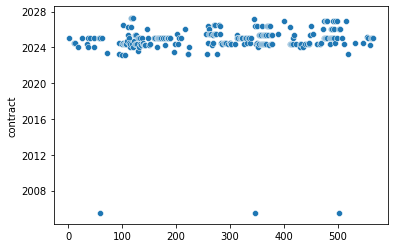

In [445]:
sns.scatterplot(data = liga1_player.contract)

In [446]:
liga1_player[liga1_player.contract < datetime.datetime(2012,1,1)]

,kit_number,player_name,position,nationality,height_M,foot,joined,signed_from,contract,market_value_EUR,club_name,birth_date,age,young_player
58,74,Mohammed Rashid,Defensive Midfield,Palestine,1.83,right,2023-07-13,Jabal Al-Mokaber,2005-07-16,250000.0,Bali United FC,1995-07-03,28.0,no
346,99,Yandi Sofyan,Centre-Forward,Indonesia,1.76,right,2022-05-26,Persikota Tangerang,2005-07-16,75000.0,Persikabo 1973,1992-05-25,31.0,no
503,77,Syamil Bahij,Goalkeeper,Indonesia,1.80,NaN,2023-07-14,Without Club,2005-07-16,NaN,PSM Makassar,NaT,NaN,yes


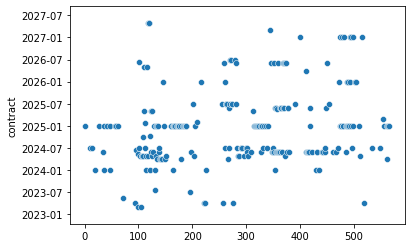

In [447]:
sns.scatterplot(data= liga1_player[liga1_player.contract > datetime.datetime(2020,1,1)]["contract"])

In [475]:
(liga1_player.contract - liga1_player.joined).dt.days

0         NaN
1       979.0
2         NaN
3         NaN
4         NaN
        ...  
563       NaN
564    1357.0
565       NaN
566     986.0
567       NaN
Length: 568, dtype: float64

In [473]:
liga1_player.contract - liga1_player.joined

0           NaT
1      979 days
2           NaT
3           NaT
4           NaT
         ...   
563         NaT
564   1357 days
565         NaT
566    986 days
567         NaT
Length: 568, dtype: timedelta64[ns]

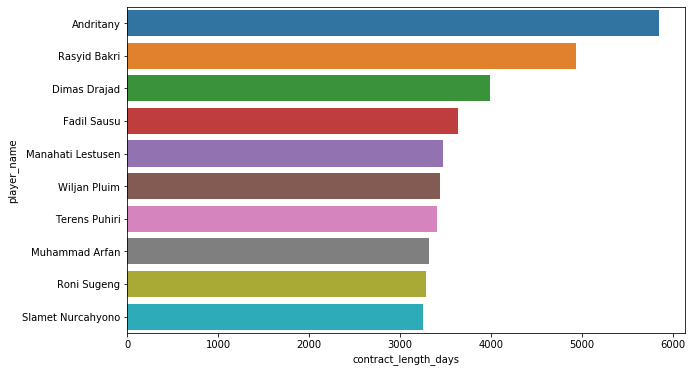

In [479]:
# player with longest contract_length
liga1_player["contract_length_days"] = (liga1_player.contract - liga1_player.joined).dt.days
vet_player = liga1_player.sort_values(by="contract_length_days", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=vet_player[3:13], x="contract_length_days", y="player_name")

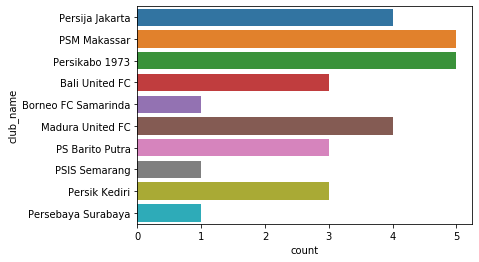

In [485]:
sns.countplot(data=vet_player[3:33][["player_name","position","nationality","club_name","age","joined","contract","contract_length_days"]], y="club_name")

# market_value

In [ ]:
sns.barplot(data=liga1_player.sort_values(by = "market_value_EUR", ascending=False)[:5], x="market_value_EUR", y="player_name")

In [ ]:
liga1_player.sort_values(by = "market_value_EUR", ascending=False)

In [ ]:
indonesian_player = liga1_player[liga1_player.nationality == "Indonesia"]

In [ ]:
sns.barplot(data = indonesian_player.sort_values(by="market_value_EUR", ascending=False)[:5], x="market_value_EUR", y="player_name")

# club name

In [ ]:
# number of player from every club
sns.countplot(data=liga1_player, y="club_name")

In [ ]:
# sns.barplot(data= liga1_player.groupby(by="club_name").sum(), x="market_value_EUR")
sns.barplot(data = pd.DataFrame(liga1_player.groupby(by="club_name").sum()).reset_index(), x="market_value_EUR", y="club_name")

In [ ]:
sns.kdeplot(data=liga1_player, x="market_value_EUR", hue="club_name")
